<a href="https://colab.research.google.com/github/jocastrocUnal/EfectoMateo/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imageio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.stats import boxcox


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# <center>Análisis del Efecto Mateo en las Tasas de Mortalidad Infantil</center>
<center>Venus Celeste Puertas Gualtero, Joan Nicolás Castro Cortes</center>

El siguiente conjunto de datos contiene las tasas de mortalidad infantil (niños menores de 5 años) entre los años 1950 y 2022 para todos los países del mundo. En este cuaderno se busca estudiar el comportamiento de las tasas de mortalidad en Latinoamérica y detectar la presencia del efecto Mateo en caso de que exista

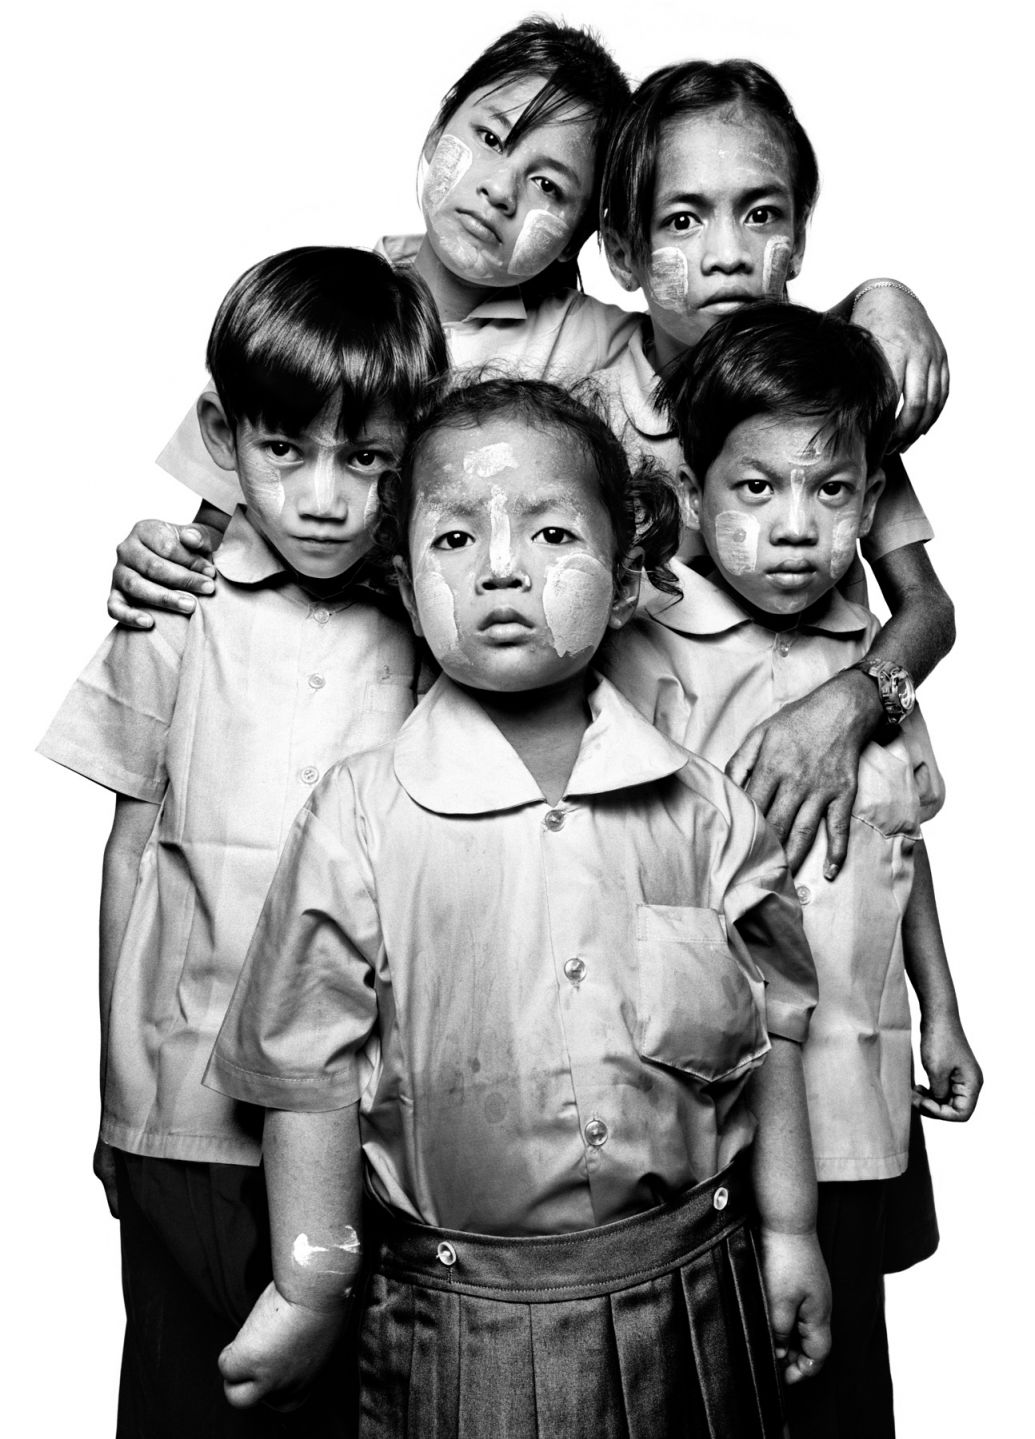

## Carga de datos y eliminación de NAs

In [4]:
#child = pd.read_csv('/content/drive/MyDrive/Seminario/datos/child_mortality.csv')
child = pd.read_csv('datos/child_mortality.csv')

datos = child.loc[:, ['country'] + list(map(str, range(1950, 2023)))]

datos.dropna(inplace=True)

Filtramos únicamente por los países latinoamericanos

In [5]:
paises_latinoamericanos = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica',
    'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala',
    'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
    'Uruguay', 'Venezuela', 'Belize', 'Guyana', 'Suriname'
]
# Filtrar el dataframe

datos = datos[datos['country'].isin(paises_latinoamericanos)]

In [6]:
# Establece la columna 'country' como el índice del DataFrame
datos.set_index('country', inplace=True)
datos

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Argentina,93.6,92.0,88.8,85.7,81.2,84.2,76.6,93.6,82.7,77.9,...,12.70,12.10,11.50,10.90,10.40,9.94,9.66,9.40,9.16,8.94
Belize,176.0,173.0,169.0,164.0,160.0,156.0,152.0,148.0,144.0,140.0,...,16.90,16.10,15.30,14.50,13.80,13.00,12.70,12.40,12.10,11.80
Bolivia,318.0,317.0,314.0,312.0,309.0,306.0,303.0,300.0,297.0,294.0,...,34.40,32.40,30.80,29.30,28.00,26.80,26.10,25.40,24.70,23.90
Brazil,212.0,211.0,207.0,203.0,200.0,196.0,190.0,185.0,179.0,174.0,...,16.70,16.20,15.70,16.40,14.80,14.30,13.90,13.50,13.10,12.70
Chile,238.0,229.0,221.0,212.0,204.0,197.0,186.0,178.0,172.0,168.0,...,8.26,8.10,7.89,7.66,7.43,7.19,7.03,6.86,6.68,6.50
Colombia,188.0,185.0,179.0,173.0,167.0,162.0,156.0,151.0,146.0,141.0,...,16.80,16.20,15.70,15.20,14.70,14.20,13.80,13.50,13.10,12.80
Costa Rica,141.0,139.0,135.0,132.0,128.0,124.0,121.0,117.0,114.0,110.0,...,9.46,9.24,9.05,8.93,8.85,8.79,8.47,8.19,7.96,7.75
Cuba,44.1,49.7,48.3,48.3,41.4,45.5,42.7,46.9,47.6,48.3,...,5.67,5.52,5.38,5.24,5.11,4.98,4.90,4.82,4.74,4.66
Dominican Republic,147.0,148.0,148.0,148.0,149.0,149.0,149.0,149.0,149.0,148.0,...,32.70,32.10,31.30,30.60,29.70,28.90,28.30,27.70,27.00,26.30


In [7]:
# Transpone el DataFrame
datos_transpuesto = datos.T

# Resetea el índice del DataFrame transpuesto
datos_transpuesto.reset_index(inplace=True)

# Renombra la columna 'index' a 'year'
datos_transpuesto.rename(columns={'index': 'year'}, inplace=True)
datos_transpuesto['year']=datos_transpuesto['year'].astype(int)

In [8]:
datos_transpuesto.describe()

country,year,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,...,Honduras,Mexico,Nicaragua,Panama,Peru,Paraguay,El Salvador,Suriname,Uruguay,Venezuela
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.000000,41.247945,66.075342,152.926027,87.676712,60.422466,65.783562,44.681096,22.973836,81.561644,...,99.719178,76.590411,100.347945,47.594521,114.115068,54.005479,93.361644,56.949315,34.034384,45.794521
std,21.217131,26.843518,51.203463,98.894812,63.664054,68.873249,52.935078,43.277739,17.184693,45.600617,...,79.157967,64.968198,73.045513,30.728040,89.501506,24.531832,69.706162,30.151544,21.006475,27.984216
min,1950.000000,8.940000,11.800000,23.900000,12.700000,6.500000,12.800000,7.750000,4.660000,26.300000,...,15.800000,11.900000,16.100000,14.000000,12.600000,18.800000,11.700000,17.100000,6.860000,17.000000
25%,1968.000000,17.100000,21.300000,59.400000,26.600000,9.290000,22.200000,10.800000,7.400000,37.300000,...,30.800000,21.400000,28.200000,23.500000,28.500000,30.700000,26.300000,30.000000,15.100000,24.500000
50%,1986.000000,29.600000,48.800000,141.000000,74.100000,22.200000,40.900000,21.800000,16.300000,70.000000,...,70.600000,54.100000,77.900000,35.000000,99.900000,52.800000,75.300000,53.300000,27.400000,34.700000
75%,2004.000000,64.900000,106.000000,241.000000,139.000000,86.700000,105.000000,79.800000,41.400000,129.000000,...,158.000000,115.000000,180.000000,70.400000,175.000000,78.800000,157.000000,77.600000,56.100000,65.500000
max,2022.000000,93.600000,176.000000,318.000000,212.000000,238.000000,188.000000,141.000000,54.700000,149.000000,...,265.000000,255.000000,225.000000,118.000000,309.000000,89.000000,211.000000,123.000000,64.300000,116.000000


El siguiente gif permite observar el comportamiento de las tasas de mortalidad

In [9]:
paises = datos_transpuesto.columns[1:]
# Convertir la columna 'Fecha' a tipo datetime
datos_transpuesto['YEAR'] = pd.to_datetime(datos_transpuesto['year'])


In [10]:

imagenes = []
for pais in paises:

  # Crear el gráfico de línea
  plt.figure(figsize=(10, 10))
  plt.plot(datos_transpuesto['YEAR'], datos_transpuesto[pais], marker='o', linestyle='-', color='b')
  plt.title('Gráfico de línea de datos temporales')
  plt.xlabel(pais)
  plt.ylabel(pais)
  plt.grid(True)
  plt.tight_layout()
  filename = f"temp_{pais}.png"
  plt.savefig(filename)
  plt.close()

  # Agregar la imagen a la lista
  imagenes.append(imageio.imread(filename))

# Crear el GIF
imageio.mimsave('graficos.gif', imagenes, duration=100)

<ipython-input-10-545aea0817bb>:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenes.append(imageio.imread(filename))


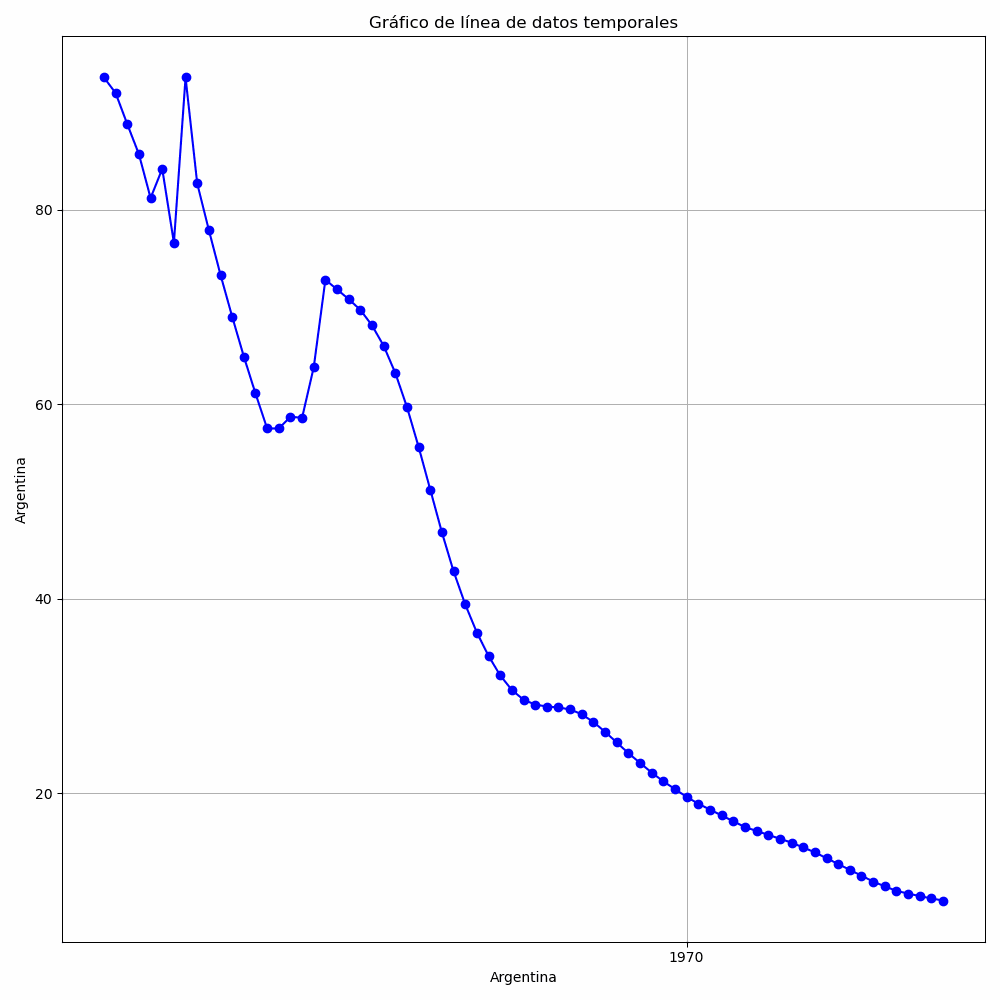







In [11]:
# for col in datos_transpuesto.columns[1:-1]:
#     datos_transpuesto[col], _ = boxcox(datos_transpuesto[col])



In [12]:
datos_transpuesto

country,year,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,...,Mexico,Nicaragua,Panama,Peru,Paraguay,El Salvador,Suriname,Uruguay,Venezuela,YEAR
0,1950,93.60,176.0,318.0,212.0,238.00,188.0,141.00,44.10,147.0,...,224.0,225.0,118.0,309.0,89.0,211.0,123.0,61.00,107.0,1970-01-01 00:00:00.000001950
1,1951,92.00,173.0,317.0,211.0,229.00,185.0,139.00,49.70,148.0,...,255.0,223.0,116.0,307.0,89.0,211.0,122.0,60.70,116.0,1970-01-01 00:00:00.000001951
2,1952,88.80,169.0,314.0,207.0,221.00,179.0,135.00,48.30,148.0,...,239.0,217.0,113.0,304.0,88.9,211.0,119.0,60.10,111.0,1970-01-01 00:00:00.000001952
3,1953,85.70,164.0,312.0,203.0,212.00,173.0,132.00,48.30,148.0,...,224.0,212.0,110.0,291.0,88.5,210.0,116.0,59.40,106.0,1970-01-01 00:00:00.000001953
4,1954,81.20,160.0,309.0,200.0,204.00,167.0,128.00,41.40,149.0,...,210.0,207.0,106.0,278.0,87.9,209.0,112.0,58.60,101.0,1970-01-01 00:00:00.000001954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,9.94,13.0,26.8,14.3,7.19,14.2,8.79,4.98,28.9,...,12.7,18.3,15.3,14.3,20.1,13.7,18.9,7.58,24.5,1970-01-01 00:00:00.000002018
69,2019,9.66,12.7,26.1,13.9,7.03,13.8,8.47,4.90,28.3,...,12.5,17.9,14.9,13.9,19.8,13.1,18.4,7.38,25.3,1970-01-01 00:00:00.000002019
70,2020,9.40,12.4,25.4,13.5,6.86,13.5,8.19,4.82,27.7,...,12.3,17.3,14.6,13.5,19.4,12.6,17.9,7.20,25.5,1970-01-01 00:00:00.000002020
71,2021,9.16,12.1,24.7,13.1,6.68,13.1,7.96,4.74,27.0,...,12.1,16.7,14.3,13.1,19.1,12.2,17.5,7.02,25.3,1970-01-01 00:00:00.000002021


In [13]:
# Asegurarse de que 'Grado' sea numérico
datos_transpuesto['Grado'] = pd.to_numeric(datos_transpuesto['year'])

# Calcula el grado medio para cada niño
datos_transpuesto['Grado Medio'] = datos_transpuesto['Grado'].mean()

# Crea una nueva columna para la variable independiente ajustada (Grado - Grado Medio)
datos_transpuesto['Grado Ajustado'] = datos_transpuesto['Grado'] - datos_transpuesto['Grado Medio']


In [14]:
datos_transpuesto

country,year,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,...,Peru,Paraguay,El Salvador,Suriname,Uruguay,Venezuela,YEAR,Grado,Grado Medio,Grado Ajustado
0,1950,93.60,176.0,318.0,212.0,238.00,188.0,141.00,44.10,147.0,...,309.0,89.0,211.0,123.0,61.00,107.0,1970-01-01 00:00:00.000001950,1950,1986.0,-36.0
1,1951,92.00,173.0,317.0,211.0,229.00,185.0,139.00,49.70,148.0,...,307.0,89.0,211.0,122.0,60.70,116.0,1970-01-01 00:00:00.000001951,1951,1986.0,-35.0
2,1952,88.80,169.0,314.0,207.0,221.00,179.0,135.00,48.30,148.0,...,304.0,88.9,211.0,119.0,60.10,111.0,1970-01-01 00:00:00.000001952,1952,1986.0,-34.0
3,1953,85.70,164.0,312.0,203.0,212.00,173.0,132.00,48.30,148.0,...,291.0,88.5,210.0,116.0,59.40,106.0,1970-01-01 00:00:00.000001953,1953,1986.0,-33.0
4,1954,81.20,160.0,309.0,200.0,204.00,167.0,128.00,41.40,149.0,...,278.0,87.9,209.0,112.0,58.60,101.0,1970-01-01 00:00:00.000001954,1954,1986.0,-32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,9.94,13.0,26.8,14.3,7.19,14.2,8.79,4.98,28.9,...,14.3,20.1,13.7,18.9,7.58,24.5,1970-01-01 00:00:00.000002018,2018,1986.0,32.0
69,2019,9.66,12.7,26.1,13.9,7.03,13.8,8.47,4.90,28.3,...,13.9,19.8,13.1,18.4,7.38,25.3,1970-01-01 00:00:00.000002019,2019,1986.0,33.0
70,2020,9.40,12.4,25.4,13.5,6.86,13.5,8.19,4.82,27.7,...,13.5,19.4,12.6,17.9,7.20,25.5,1970-01-01 00:00:00.000002020,2020,1986.0,34.0
71,2021,9.16,12.1,24.7,13.1,6.68,13.1,7.96,4.74,27.0,...,13.1,19.1,12.2,17.5,7.02,25.3,1970-01-01 00:00:00.000002021,2021,1986.0,35.0


In [15]:
print(datos_transpuesto.columns.to_list())

['year', 'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Guyana', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador', 'Suriname', 'Uruguay', 'Venezuela', 'YEAR', 'Grado', 'Grado Medio', 'Grado Ajustado']


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Cargar el dataframe
data = datos_transpuesto

def calcular_pendiente_media(y):
    # Definir el modelo de regresión
    X = data['Grado Ajustado']  # Grado Ajustado como variable independiente
    X = sm.add_constant(X)  # añadir una constante para el término de intersección

    # Ajustar el modelo de regresión
    modelo = sm.OLS(y, X).fit()

    # Obtener la pendiente y la intersección (media)
    pendiente, interseccion = modelo.params['Grado Ajustado'], modelo.params['const']
    pvalue_pendiente, pvalue_interseccion = modelo.pvalues['Grado Ajustado'], modelo.pvalues['const']
    r_squared = modelo.rsquared
    shapiro_stat, shapiro_p = stats.shapiro(modelo.resid)
    return pd.Series({
        'Media': interseccion,
        'Pendiente': pendiente,
        'P-Value Media': pvalue_interseccion,
        'P-Value Pendiente': pvalue_pendiente,
        'R^2': r_squared,
        'Shapiro Statistic': shapiro_stat,
        'Shapiro P-Value': shapiro_p
    })

# Eliminar las columnas que no corresponden a países
data_paises = data.drop(columns=['year', 'Grado', 'Grado Medio', 'Grado Ajustado','YEAR'])

# Aplicar la función a cada país
resultados = data_paises.apply(calcular_pendiente_media)


In [17]:
resultadost=resultados.T

In [18]:
resultadost.describe()

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
count,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,2.200000e+01
mean,73.377621,-2.370605,5.075256e-26,6.562297e-26,0.915188,0.907465,1.765029e-03
std,31.155206,1.116961,2.380506e-25,3.075786e-25,0.053664,0.047879,2.870735e-03
min,22.973836,-4.619857,1.585336e-83,5.059956e-64,0.773128,0.781899,4.860151e-09
25%,49.197260,-3.193999,3.002005e-61,1.578989e-48,0.885197,0.883944,7.171540e-06
50%,65.963699,-2.325620,5.563160e-55,1.029673e-41,0.931288,0.926813,4.258572e-04
75%,91.940411,-1.307494,1.137870e-47,5.495899e-35,0.955655,0.941037,1.962453e-03
max,152.926027,-0.764139,1.116556e-24,1.442718e-24,0.982389,0.955016,1.088516e-02


Dado que queremos estudiar la reducción en las tasas de mortalidad, verificamos si alguna de ellas presenta un comportamiento creciente para excluirla del análisis.

In [19]:
# Pendiente positiva
resultadost.loc[resultadost['Pendiente']>0]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,


Verificamos para cuáles modelos se evidencia que el coeficiente de la pendiente no es significativo

In [20]:
# P valores significativos a más del 5 por ciento
resultadost.loc[resultadost['P-Value Pendiente']> 0.05]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,


Filtramos para conseguir los modelos cuya variabilidad es explicada por el modelo en al menos un 70%.

In [21]:
resultadost=resultadost.loc[resultadost['Pendiente']<=0]
resultadost=resultadost.loc[resultadost['P-Value Pendiente']<= 0.05]
# resultadost=resultadost.loc[resultadost['R^2']>= 0.7]

In [22]:
resultadost['R^2'].describe()

count    22.000000
mean      0.915188
std       0.053664
min       0.773128
25%       0.885197
50%       0.931288
75%       0.955655
max       0.982389
Name: R^2, dtype: float64

In [23]:
resultadost.loc[resultadost['R^2']<0.90]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,
Chile,60.422466,-2.854233,1.116556e-24,1.442718e-24,0.773128,0.940663,1.877570e-03
Colombia,65.783562,-2.345181,6.557751e-43,7.026642e-35,0.883566,0.949450,5.406731e-03
Costa Rica,44.681096,-1.841545,2.253989e-31,9.872021e-28,0.815096,0.952287,7.701620e-03
Cuba,22.973836,-0.764139,7.427584e-46,9.036724e-36,0.890091,0.920564,2.047293e-04
Guyana,65.852055,-1.286394,4.126303e-59,1.907703e-33,0.872241,0.846386,3.322229e-07
Mexico,76.590411,-2.858657,5.249974e-40,2.306541e-33,0.871557,0.850154,4.386175e-07
Panama,47.594521,-1.370795,5.702263e-51,1.320832e-36,0.895877,0.935226,1.003769e-03
Venezuela,45.794521,-1.221020,6.408227e-48,1.045260e-31,0.857023,0.864043,1.267412e-06


In [24]:
import matplotlib.pyplot as plt

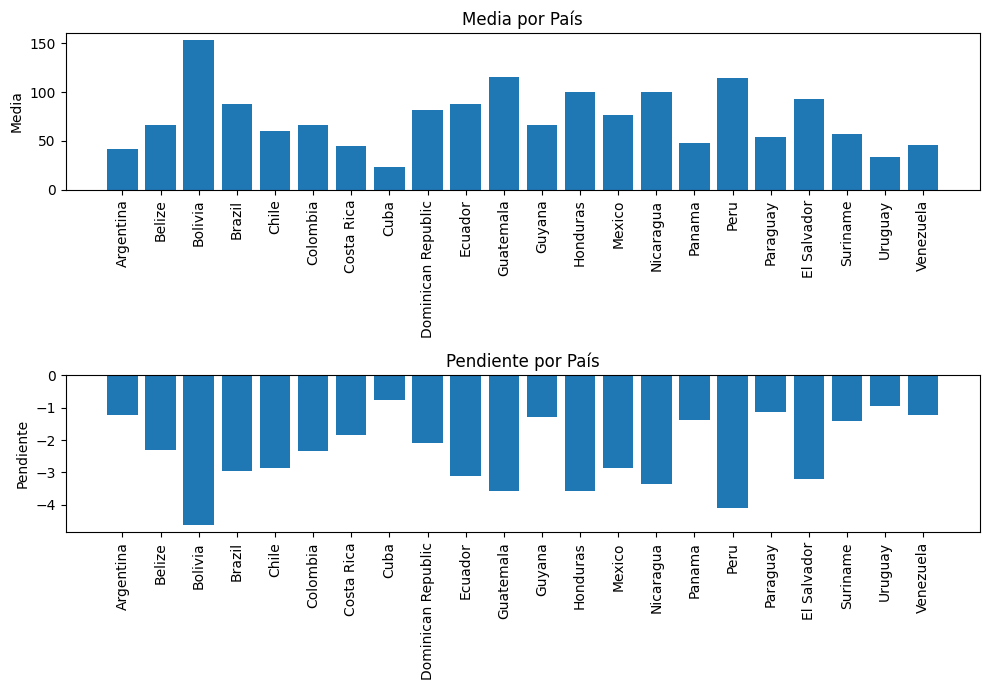

In [25]:
# Graficar la media y la pendiente
fig, ax = plt.subplots(2,1,figsize=(10,7))


# Graficar la media
ax[0].bar(resultadost.index, resultadost['Media'])
ax[0].set_title('Media por País')
ax[0].set_ylabel('Media')
ax[0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x para mejor legibilidad

# Graficar la pendiente
ax[1].bar(resultadost.index, resultadost['Pendiente'])
ax[1].set_title('Pendiente por País')
ax[1].set_ylabel('Pendiente')
ax[1].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()



El anterior gráfico permite ver que en los picos de medias hay también picos negativos de pendientes, lo que puede indicar una relación inversamente proporcional entre la media y la pendiente. Es decir que países latinoamericanos con tasas de mortalidad más alta suelen tener una reducción de dicha tasa mucho más rápidamente.

In [26]:
datos

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Argentina,93.6,92.0,88.8,85.7,81.2,84.2,76.6,93.6,82.7,77.9,...,12.70,12.10,11.50,10.90,10.40,9.94,9.66,9.40,9.16,8.94
Belize,176.0,173.0,169.0,164.0,160.0,156.0,152.0,148.0,144.0,140.0,...,16.90,16.10,15.30,14.50,13.80,13.00,12.70,12.40,12.10,11.80
Bolivia,318.0,317.0,314.0,312.0,309.0,306.0,303.0,300.0,297.0,294.0,...,34.40,32.40,30.80,29.30,28.00,26.80,26.10,25.40,24.70,23.90
Brazil,212.0,211.0,207.0,203.0,200.0,196.0,190.0,185.0,179.0,174.0,...,16.70,16.20,15.70,16.40,14.80,14.30,13.90,13.50,13.10,12.70
Chile,238.0,229.0,221.0,212.0,204.0,197.0,186.0,178.0,172.0,168.0,...,8.26,8.10,7.89,7.66,7.43,7.19,7.03,6.86,6.68,6.50
Colombia,188.0,185.0,179.0,173.0,167.0,162.0,156.0,151.0,146.0,141.0,...,16.80,16.20,15.70,15.20,14.70,14.20,13.80,13.50,13.10,12.80
Costa Rica,141.0,139.0,135.0,132.0,128.0,124.0,121.0,117.0,114.0,110.0,...,9.46,9.24,9.05,8.93,8.85,8.79,8.47,8.19,7.96,7.75
Cuba,44.1,49.7,48.3,48.3,41.4,45.5,42.7,46.9,47.6,48.3,...,5.67,5.52,5.38,5.24,5.11,4.98,4.90,4.82,4.74,4.66
Dominican Republic,147.0,148.0,148.0,148.0,149.0,149.0,149.0,149.0,149.0,148.0,...,32.70,32.10,31.30,30.60,29.70,28.90,28.30,27.70,27.00,26.30


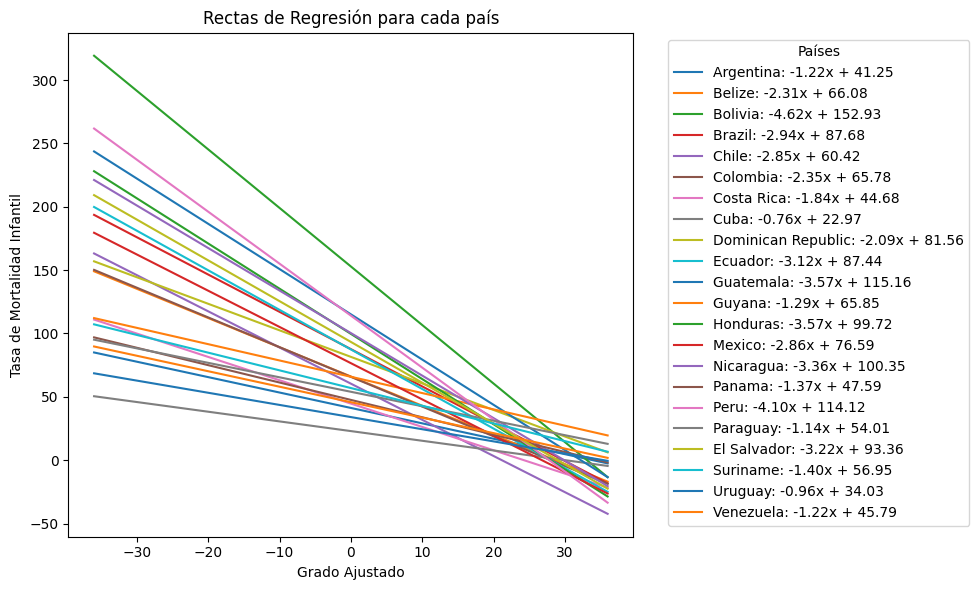

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar el dataframe
data = datos_transpuesto

def plot_regression(df, country):
    # Definir el modelo de regresión
    X = df['Grado Ajustado']  # Grado Ajustado como variable independiente
    y = df[country]  # Tasas de mortalidad infantil como variable dependiente
    X = sm.add_constant(X)  # añadir una constante para el término de intersección

    # Ajustar el modelo de regresión
    modelo = sm.OLS(y, X).fit()

    # Obtener los valores predichos para la recta de regresión
    y_pred = modelo.predict(X)

    # Trazar la recta de regresión
    plt.plot(df['Grado Ajustado'], y_pred, label=f'{country}: {modelo.params["Grado Ajustado"]:.2f}x + {modelo.params["const"]:.2f}')

# Lista de países
paises = data.columns[1:-4]  # Ajusta los índices según la estructura de tu DataFrame

# Crear una nueva figura
plt.figure(figsize=(10, 6))

# Graficar la regresión para cada país
for pais in paises:
    plot_regression(data, pais)

# Añadir etiquetas y leyenda
plt.xlabel('Grado Ajustado')
plt.ylabel('Tasa de Mortalidad Infantil')
plt.title('Rectas de Regresión para cada país')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El gráfico permite ver que, para tasas de mortalidad más altas en 1950 se presenta también una caída de la tasa más acelerada

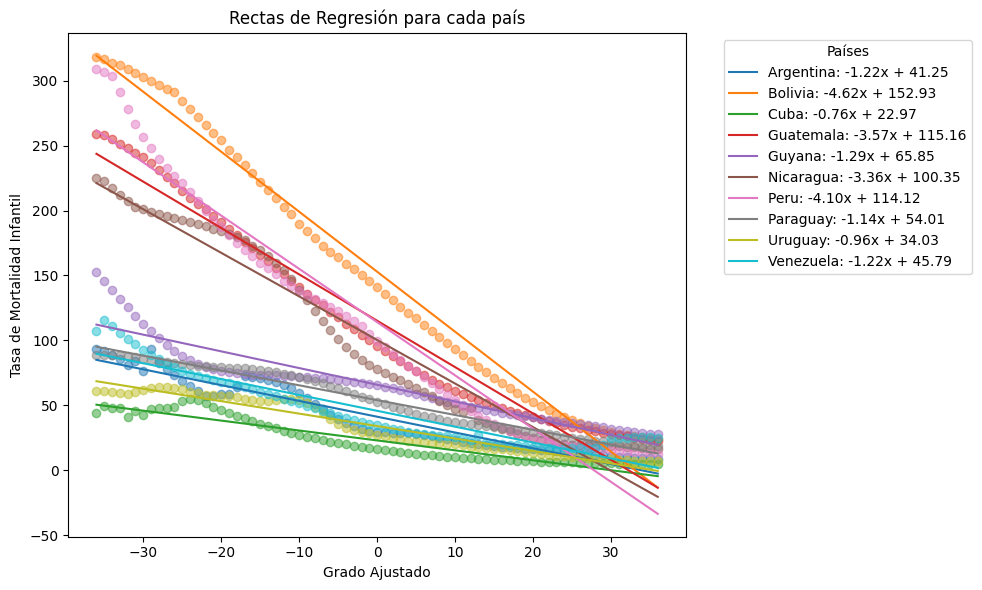

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar el dataframe
data = datos_transpuesto

def plot_regression(df, country):
    # Definir el modelo de regresión
    X = df['Grado Ajustado']  # Grado Ajustado como variable independiente
    y = df[country]  # Tasas de mortalidad infantil como variable dependiente
    X = sm.add_constant(X)  # añadir una constante para el término de intersección

    # Añadir puntos de dispersión
    plt.scatter(df['Grado Ajustado'], df[country], alpha=0.5)  # Ajusta el valor de alpha según lo que desees

    # Ajustar el modelo de regresión
    modelo = sm.OLS(y, X).fit()

    # Obtener los valores predichos para la recta de regresión
    y_pred = modelo.predict(X)

    # Trazar la recta de regresión
    plt.plot(df['Grado Ajustado'], y_pred, label=f'{country}: {modelo.params["Grado Ajustado"]:.2f}x + {modelo.params["const"]:.2f}')

# Lista de países
# resultadost.loc[resultadost['R^2']>0.99]
# resultadost.loc[resultadost['P-Value Pendiente']> 0.0001]
# resultadost.loc[resultadost['Pendiente']>0]
# resultadost.loc[resultadost['Media']>100]
# resultadost.loc[(resultadost['Pendiente'] < -4.325296) | (resultadost['Media'] < 20)]
# resultadost.loc[(resultadost['Pendiente'] > -1.325296) | (resultadost['Media'] > 150)]
#paises = data.columns[2:-3]  # Ajusta los índices según la estructura de tu DataFrame
paises = resultadost.loc[(resultadost['Pendiente'] > -1.325296) | (resultadost['Media'] > 100)].index.to_list()

# Crear una nueva figura
plt.figure(figsize=(10, 6))

# Graficar la regresión para cada país
for pais in paises:
    plot_regression(data, pais)

# Añadir etiquetas y leyenda
plt.xlabel('Grado Ajustado')
plt.ylabel('Tasa de Mortalidad Infantil')
plt.title('Rectas de Regresión para cada país')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [29]:
resultadost['Media'].corr(resultadost['Pendiente'])

-0.9322347409771959

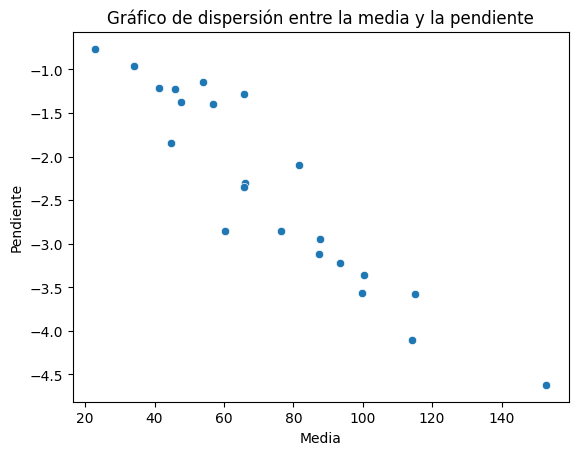

In [30]:
sns.scatterplot(data=resultadost, x='Media', y='Pendiente')

# Añadir etiquetas y título (opcional)
plt.xlabel('Media')
plt.ylabel('Pendiente')
plt.title('Gráfico de dispersión entre la media y la pendiente')

# Mostrar el gráfico
plt.show()